In [2]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade geopy
!pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: geopandas in /home/santiagoczop/.local/lib/python3.8/site-packages (0.8.1)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pyshp in /home/santiagoczop/.local/lib/python3.8/site-packages (2.1.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: shapely in /home/santiagoczop/.local/lib/python3.8/site-packages (1.7.1)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: descartes in /home/santiagoczop/.local/lib/python3.8/site-packages (1.1.0)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: geopy in /home/santiagoczop/.local/lib/python3.8/site-packages (2.0.0)
Defaulting to user installation because normal site-packages is not writeable
Require

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
import plotly.express as px

In [6]:
url = 'https://raw.githubusercontent.com/Fiuba-Big-Data-Analytics/Fiuba-Big-Data-Analytics-TPs/main/Tp1/Datos/Entrenamieto_ECI_2020.csv'
df = pd.read_csv(url)

#Full_correction
Lo translado al cuaderno bySanti

In [8]:
def full_correction(df):
    date_correction(df)
    numeric_correction(df)
    name_correction(df)
    categoric_to_numeric(df)
    delete_correction(df)

def categoric_to_numeric(df):
    _bureaucratic_code_to_numeric(df)
    _source_to_numeric(df)
    _account_name_to_numeric(df)
    _opportunity_name_to_numeric(df)
    _account_type_to_numeric(df)
    _opportunity_type_to_numeric(df)
    _account_owner_to_numeric(df)
    _opportunity_owner_to_numeric(df)
    _brand_to_numeric(df)
    _product_type_to_numeric(df)
    _last_modified_by_to_numeric(df)
    _product_family_to_numeric(df)
    _product_name_to_numeric(df)

def date_correction(df):
    _account_created_date_correction(df)
    _opportunity_created_date_correction(df)
    _quote_expiry_date_correction(df)
    _last_modified_date_correction(df)
    _planned_delivery_start_date_correction(df)
    _planned_delivery_end_date_correction(df)
    _month_correction(df)

def numeric_correction(df):
    _sales_contract_no_correction(df)
    _price_correction(df)

def name_correction(df):
    _total_power_correction(df)
    _source_correction(df)

def delete_correction(df):
    _last_activity_delete(df)
    _actual_delivery_date_delete(df)

# DATE SECTION

""" Converts column to date"""
def _account_created_date_correction(df):
    df["Account_Created_Date"] = pd.to_datetime(df["Account_Created_Date"])

""" Converts column to date"""
def _opportunity_created_date_correction(df):
    df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"])

""" Converts column to date"""
def _last_activity_correction(df):
    #df["Last_Activity"] = pd.to_datetime(df["Last_Activity"])
    return

""" Converts column to Datetime"""
def _quote_expiry_date_correction(df):
    df["Quote_Expiry_Date"] = pd.to_datetime(df["Quote_Expiry_Date"])

""" Converts column to Datetime"""
def _last_modified_date_correction(df):
    df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"])

""" Converts column to Datetime"""
def _planned_delivery_start_date_correction(df):
    df["Planned_Delivery_Start_Date"] = pd.to_datetime(df["Planned_Delivery_Start_Date"])

""" Converts column to Datetime"""
def _planned_delivery_end_date_correction(df):
    df["Planned_Delivery_End_Date"] = pd.to_datetime(df["Planned_Delivery_End_Date"])

""" Converts 'year - month' to (month, year)"""
def _month_correction(df):
    df["Month"] = df["Month"].map(lambda x: x.split(" "))
    df["Month"] = df["Month"].map(lambda x: (x[2], x[0])) # (month, year)

""" Converts column to Datetime"""
def _actual_delivery_date_correction(df):
    #df["Actual_Delivery_Date"] = pd.to_datetime(df["Actual_Delivery_Date"])
    return

# INT SECTION

""" Converts None to nan"""
def _sales_contract_no_correction(df):
    df["Sales_Contract_No"] = pd.to_numeric(df["Sales_Contract_No"], errors="coerce")

# FLOAT SECTION

""" Converts None and Other to nan"""
def _price_correction(df):
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# NAME SECTION
def _total_power_correction(df):
    df.rename(columns={"TRF": "Total_Power"}, inplace=True)

def _source_correction(df):
    df.rename(columns={"Source ": "Source"}, inplace=True)

# DELETE SECTION
def _last_activity_delete(df):
    df.drop(columns="Last_Activity", inplace=True)

def _actual_delivery_date_delete(df):
    df.drop(columns="Actual_Delivery_Date", inplace=True)

# TO NUMERIC SECTION
def _bureaucratic_code_to_numeric(df):
    df["Bureaucratic_Code"] = df["Bureaucratic_Code"].str.replace("Bureaucratic_Code_", "")
    df["Bureaucratic_Code"] = pd.to_numeric(df["Bureaucratic_Code"])

def _source_to_numeric(df):
    df["Source"] = df["Source"].str.replace("Source_", "")
    df["Source"] = pd.to_numeric(df["Source"], errors="coerce")

def _account_name_to_numeric(df):
    df["Account_Name"] = df["Account_Name"].str.replace("Account_Name_", "")
    df["Account_Name"] = pd.to_numeric(df["Account_Name"])

def _opportunity_name_to_numeric(df):
    df["Opportunity_Name"] = df["Opportunity_Name"].str.replace("Opportunity_Name_", "")
    df["Opportunity_Name"] = pd.to_numeric(df["Opportunity_Name"])

def _account_owner_to_numeric(df):
    df["Account_Owner"] = df["Account_Owner"].str.replace("Person_Name_", "")
    df["Account_Owner"] = pd.to_numeric(df["Account_Owner"])

def _opportunity_owner_to_numeric(df):
    df["Opportunity_Owner"] = df["Opportunity_Owner"].str.replace("Person_Name_", "")
    df["Opportunity_Owner"] = pd.to_numeric(df["Opportunity_Owner"])

def _account_type_to_numeric(df):
    df["Account_Type"] = df["Account_Type"].str.replace("Account_Type_", "")
    df["Account_Type"] = pd.to_numeric(df["Account_Type"], errors="coerce")

def _opportunity_type_to_numeric(df):
    df["Opportunity_Type"] = df["Opportunity_Type"].str.replace("Opportunity_Type_", "")
    df["Opportunity_Type"] = pd.to_numeric(df["Opportunity_Type"])

def _delivery_terms_to_numeric(df):
    df["Delivery_Terms"] = df["Delivery_Terms"].str.replace("Delivery_Terms_", "")
    df["Delivery_Terms"] = pd.to_numeric(df["Delivery_Terms"])

def _brand_to_numeric(df):
    df["Brand"] = df["Brand"].str.replace("Brand_", "")
    df["Brand"] = pd.to_numeric(df["Brand"], errors="coerce")

def _product_type_to_numeric(df):
    df["Product_Type"] = df["Product_Type"].str.replace("Product_Type_", "")
    df["Product_Type"] = pd.to_numeric(df["Product_Type"], errors="coerce")

def _last_modified_by_to_numeric(df):
    df["Last_Modified_By"] = df["Last_Modified_By"].str.replace("Person_Name_", "")
    df["Last_Modified_By"] = pd.to_numeric(df["Last_Modified_By"])

def _product_family_to_numeric(df):
    df["Product_Family"] = df["Product_Family"].str.replace("Product_Family_", "")
    df["Product_Family"] = pd.to_numeric(df["Product_Family"])

def _product_name_to_numeric(df):
    df["Product_Name"] = df["Product_Name"].str.replace("Product_Name_", "")
    df["Product_Name"] = pd.to_numeric(df["Product_Name"])

#Me familiarizo con con los tipos de datos, las columnas y las filas del DF

In [10]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [12]:
# nos da las dimensiones del data frame (rows x columns)
print(df.shape)

(16947, 52)


In [14]:
df.count()

ID                                    16947
Region                                16947
Territory                             16947
Pricing, Delivery_Terms_Quote_Appr    16947
Pricing, Delivery_Terms_Approved      16947
Bureaucratic_Code_0_Approval          16947
Bureaucratic_Code_0_Approved          16947
Submitted_for_Approval                16947
Bureaucratic_Code                     16947
Account_Created_Date                  16947
Source                                16947
Billing_Country                       16947
Account_Name                          16947
Opportunity_Name                      16947
Opportunity_ID                        16947
Sales_Contract_No                     16947
Account_Owner                         16947
Opportunity_Owner                     16947
Account_Type                          16947
Opportunity_Type                      16947
Quote_Type                            16947
Delivery_Terms                        16947
Opportunity_Created_Date        

In [16]:
type(df.columns)

pandas.core.indexes.base.Index

In [18]:
df.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

In [22]:
df.select_dtypes('number')

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
0,27761,1,1,1,1,0,0,0.5200,0.58817,2016,10,5272800.00,5272800.0
1,27760,0,0,0,0,0,1,0.5300,0.59948,2016,0,48230.00,48230.0
2,27446,0,0,0,0,0,2,0.4800,0.48000,2016,0,83865.60,83865.6
3,16808,1,0,1,0,0,3,0.5300,0.53000,2018,14,7421881.50,7421881.5
4,16805,1,0,1,0,0,4,0.5300,0.53000,2018,25,13357192.50,13357192.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,1,1,1,1,0,12801,0.5200,0.58817,2016,0,103350.00,299715.0
16943,8786,1,1,1,1,0,12801,0.5200,0.58817,2016,0,93015.00,299715.0
16944,8792,1,1,1,1,0,12801,0.5200,0.58817,2016,0,103350.00,299715.0
16945,28561,1,1,1,1,0,12802,0.6375,0.63750,2016,4,2346796.88,0.0


##Billing_Country
Quiero analizar los país donde se emiten más facturas

####Uso lo echo por Lean para graficar


# Grafico con mapa


In [38]:
df2 = df.drop_duplicates(subset="Opportunity_Name")
facturacion_por_pais = df2[['Billing_Country', 'ID']].groupby('Billing_Country').count().rename(columns = {'ID' : 'Total_Facturas'})\
            .sort_values(by=['Total_Facturas'],ascending=False)
facturacion_por_pais = facturacion_por_pais.reset_index()
facturacion_por_pais

,Billing_Country,Total_Facturas
0,United States,2350
1,Japan,1899
2,Germany,1308
3,India,560
4,Australia,559
...,...,...
75,Morocco,1
76,Libya,1
77,Oman,1
78,Kenya,1


Detecto que hay algunos territorios que no se encuentran dentro del GeoDataFrame World

In [39]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = pd.DataFrame(world[world.name != 'Antarctica']).sort_values(by=['name'])
world.name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Is

# Reviso que los nombres de los paises esten iguales para que al graficar detecte todos los paises usando el GeoPandas

In [40]:
facturacion_por_pais.loc[(facturacion_por_pais.Billing_Country =='United States'),'Billing_Country'] = 'United States of America'
facturacion_por_pais.loc[(facturacion_por_pais.Billing_Country =='Czech Republic'),'Billing_Country'] = 'Czechia'
facturacion_por_pais.loc[(facturacion_por_pais.Billing_Country =='Bosnia and Herzegovina'),'Billing_Country'] = 'Bosnia and Herz.'
facturacion_por_pais.loc[(facturacion_por_pais.Billing_Country =='Korea, Democratic People\'s Republic of'),'Billing_Country'] = 'North Korea'
facturacion_por_pais.loc[(facturacion_por_pais.Billing_Country =='Korea, Republic of'),'Billing_Country'] = 'South Korea'
facturacion_por_pais.loc[(facturacion_por_pais.Billing_Country =='Macedonia, the former Yugoslav Republic of'),'Billing_Country'] = 'Macedonia'
facturacion_por_pais.loc[(facturacion_por_pais.Billing_Country =='Dominican Republic'),'Billing_Country'] = 'Dominican Rep.'
facturacion_por_pais.loc[(facturacion_por_pais.Billing_Country =='Viet Nam'),'Billing_Country'] = 'Vietnam'

In [41]:
facturacion_por_pais.Billing_Country.unique()

array(['United States of America', 'Japan', 'Germany', 'India',
       'Australia', 'Netherlands', 'France', 'Singapore', 'Italy',
       'Spain', 'United Kingdom', 'Belgium', 'Thailand', 'Indonesia',
       'Sri Lanka', 'Luxembourg', 'Canada', 'Philippines', 'Jordan',
       'Austria', 'China', 'United Arab Emirates', 'Poland', 'Norway',
       'Vietnam', 'Cyprus', 'Taiwan', 'None', 'New Zealand',
       'Switzerland', 'Portugal', 'Pakistan', 'Lebanon', 'Saudi Arabia',
       'Ireland', 'South Africa', 'Puerto Rico', 'Czechia', 'Denmark',
       'Hungary', 'Turkey', 'French Southern Territories', 'Sweden',
       'North Korea', 'Greece', 'Brazil', 'Malta', 'Egypt', 'South Korea',
       'Bulgaria', 'Cambodia', 'Mexico', 'Kuwait', 'Palestine', 'Bahrain',
       'Estonia', 'Ghana', 'Jamaica', 'Reunion', 'Albania', 'Myanmar',
       'Macedonia', 'Chile', 'Armenia', 'Bangladesh', 'Belarus', 'Belize',
       'Bosnia and Herz.', 'Malaysia', 'Peru', 'Argentina',
       'Dominican Rep.', 'Slo

Detecto que hay algunos paises que no se encuentran dentro del GeoDataFrame World


In [42]:
pais_fac = facturacion_por_pais.groupby('Billing_Country').count().reset_index()[['Billing_Country']].copy()
pais_fac['esta'] = pais_fac['Billing_Country'].isin(world['name'])
pais_fac[pais_fac.esta == False]

,Billing_Country,esta
5,Bahrain,False
26,French Southern Territories,False
42,Liechtenstein,False
46,Malta,False
52,None,False
63,Reunion,False
65,Singapore,False


In [43]:
top_Fac_MAP = pd.merge(facturacion_por_pais,world,left_on="Billing_Country",right_on="name",how='right')

top_Fac_MAP = geopandas.GeoDataFrame(top_Fac_MAP)

top_Fac_MAP['Total_Facturas'].fillna(0, inplace=True)

#paises con más facturación

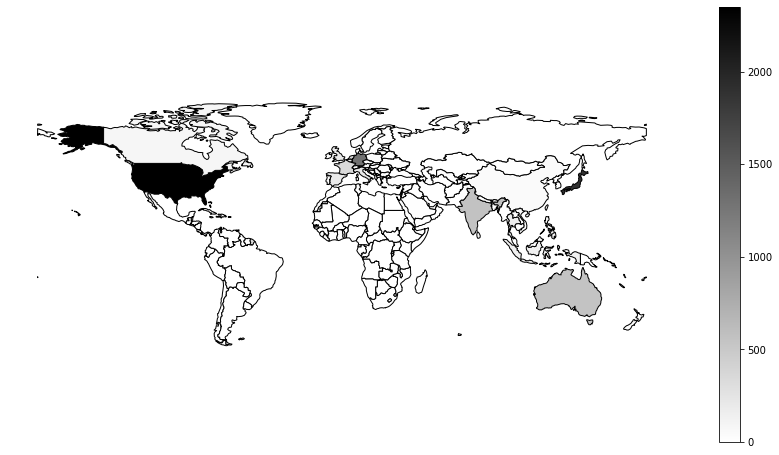

In [44]:
fig, ax = plt.subplots(1,figsize=(15, 8))
top_Fac_MAP.plot(column="Total_Facturas",cmap="binary",ax=ax,edgecolor='black', linewidth=1)
ax.axis('off')
vmin = top_Fac_MAP['Total_Facturas'].min()
vmax = top_Fac_MAP['Total_Facturas'].max()
sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.show()

In [227]:
colores = ["#ff9999", "#66b3ff", "#ffcc99", "#dfa7f2", "#99ff99"]
facturacion_por_pais.rename(columns={"Billing_Country": "País", "Total_Facturas": "Frecuencia"}, inplace=True)
facturacion_por_pais.replace({"United States of America": "USA"}, inplace=True)

<Figure size 432x288 with 0 Axes>

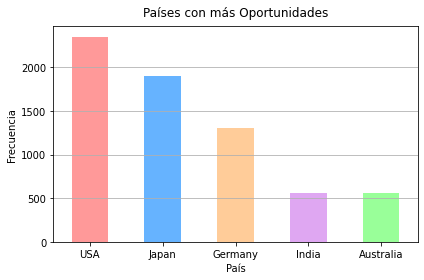

In [287]:

plt.figure(100, facecolor="w")

facturacion_por_pais.head(5).plot(x= 'País', y='Frecuencia' ,kind = 'bar', color = colores, legend=None)

#Corregí el procesamiento de datos, regenere este gráfico y me lo adueñé en billing_country.py (BySanti)
plt.title('Países con más Oportunidades', pad=10)
plt.grid(b=True, axis="y")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../BySanti/graphics/billing_country.png")

#Analizo
Opportunity_Name

Oportunidades con mas de 10 casos

In [288]:
    df_si_dupl = df[["Billing_Country","Opportunity_Name","Stage"]]
    df_sin_dupli = df.drop_duplicates(subset="Opportunity_Name")
    oportunidades = df_sin_dupli.loc[df_sin_dupli["Stage"] == "Closed Won", :]
    oportunidades = oportunidades[['Billing_Country']]
    oportunidades['Total_Oportunidades_exitosa'] = '1'
    oportunidades = oportunidades.groupby('Billing_Country').count().sort_values(by=['Total_Oportunidades_exitosa'],ascending=False)
    oportunidades = oportunidades.reset_index()

In [289]:
oportunidades.loc[(oportunidades.Billing_Country =='Korea, Democratic People\'s Republic of'),'Billing_Country'] = 'Korea, Dem. Rep.'
oportunidades.loc[(oportunidades.Billing_Country =='Korea, Republic of'),'Billing_Country'] = 'Korea, Rep.'
oportunidades

,Billing_Country,Total_Oportunidades_exitosa
0,Japan,1290
1,United States,1059
2,Germany,670
3,Australia,382
4,India,236
5,Singapore,209
6,Netherlands,188
7,Spain,104
8,Italy,93
9,France,90


#Paises con más Oportunidades concretadas

In [290]:
df_b = px.data.gapminder()
df_b = df_b[['country','continent','iso_alpha']]
oportunidades = pd.merge(oportunidades,df_b,left_on="Billing_Country",right_on="country",how='left')


In [291]:
fig = px.scatter_geo(oportunidades, locations="iso_alpha", color="Billing_Country",
                     hover_name="Billing_Country", size="Total_Oportunidades_exitosa",
                     projection="natural earth",title='Oportunidades Exitosas por Región')
fig.show()

#Analisis de las oportunidades teniendo encuenta si requieren aprobacion o no

In [292]:
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q2,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


modifico los nombres de dos columnas

In [293]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [294]:
dfBiss = pd.read_csv(url)
dfBis = dfBiss.drop_duplicates(subset="Opportunity_Name")
dfBis.columns = ['ID', 'Region', 'Territory', 'Pricing_Delivery_Terms_Quote_Approval','Pricing_Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved', 'Submitted_for_Approval','Bureaucratic_Code', 'Account_Created_Date', 'Source ','Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID','Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner','Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms','Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size','Product_Category_B', 'Price', 'Currency', 'Last_Activity','Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By','Product_Family', 'Product_Name', 'ASP_Currency', 'ASP','ASP_(converted)_Currency', 'ASP_(converted)','Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month','Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF','Total_Amount_Currency', 'Total_Amount','Total_Taxable_Amount_Currency', 'Total_Taxable_Amount', 'Stage','Prod_Category_A']

KeyError: Index(['Opportunity_Name'], dtype='object')

Recupero la cantidad de oportunidades que necesitan aprobacion y los que no nequieren aprobacion

In [54]:
df_apro = dfBis[['Pricing_Delivery_Terms_Quote_Approval', 'Pricing_Delivery_Terms_Quote_Approval']]
df_apro.columns = ['Pricing_Delivery_Terms_Quote_Approval', 'Total_Precios_apro']
df_apro = df_apro.groupby('Pricing_Delivery_Terms_Quote_Approval').count().sort_values(by=['Total_Precios_apro'],ascending=False).reset_index()
df_apro.loc[df_apro["Pricing_Delivery_Terms_Quote_Approval"] == 1,"Pricing_Delivery_Terms_Quote_Approval"] = 'requiere_aprobacion'
df_apro.loc[df_apro["Pricing_Delivery_Terms_Quote_Approval"] == 0,"Pricing_Delivery_Terms_Quote_Approval"] = 'no_requiere_aprobacion'
df_apro

,Pricing_Delivery_Terms_Quote_Approval,Total_Precios_apro
0,requiere_aprobacion,7514
1,no_requiere_aprobacion,2327


Recupero la cantidad total de los aprobados de los que necesitaban aprobacion

In [55]:
df_aprobados = dfBis.loc[dfBis.Pricing_Delivery_Terms_Quote_Approval == 1, : ]
df_aprobados = df_aprobados[['Pricing_Delivery_Terms_Approved','Pricing_Delivery_Terms_Approved']]
df_aprobados.columns = ['Pricing_Delivery_Terms_Approved', 'Total_Precios_aprobados']
df_aprobados = df_aprobados.groupby('Pricing_Delivery_Terms_Approved').count().sort_values(by=['Total_Precios_aprobados'],ascending=False).reset_index()
df_aprobados.loc[df_aprobados["Pricing_Delivery_Terms_Approved"] == 1,"Pricing_Delivery_Terms_Approved"] = 'aprobado'
df_aprobados.loc[df_aprobados["Pricing_Delivery_Terms_Approved"] == 0,"Pricing_Delivery_Terms_Approved"] = 'no_aprobaron'
df_aprobados

,Pricing_Delivery_Terms_Approved,Total_Precios_aprobados
0,aprobado,5416
1,no_aprobaron,2098


Los que se aprobaron y los que no requieren aprobacion forman los aprobados

In [56]:
df_aux1 = df_apro[['Pricing_Delivery_Terms_Quote_Approval', 'Total_Precios_apro']]
df_aux1.loc[df_aux1["Pricing_Delivery_Terms_Quote_Approval"] == 'no_requiere_aprobacion',"Pricing_Delivery_Terms_Quote_Approval"] = 'aprobado'
df_aux1.columns = ['Pricing_Delivery_Terms_Approved', 'Total_Precios_apro']
df_aux1

,Pricing_Delivery_Terms_Approved,Total_Precios_apro
0,requiere_aprobacion,7514
1,aprobado,2327


In [57]:
df_aprob_no_aprob = df_aprobados.merge(df_aux1, left_on='Pricing_Delivery_Terms_Approved', right_on='Pricing_Delivery_Terms_Approved',how='left')
df_aprob_no_aprob['Total_Precios_apro'] = df_aprob_no_aprob['Total_Precios_apro'].replace(np.nan, 0)
df_aprob_no_aprob 

,Pricing_Delivery_Terms_Approved,Total_Precios_aprobados,Total_Precios_apro
0,aprobado,5416,2327.0
1,no_aprobaron,2098,0.0


In [58]:
df_aprob_no_aprob['Total_aprobados_y_no_aprobados'] = df_aprob_no_aprob.Total_Precios_aprobados + df_aprob_no_aprob.Total_Precios_apro
df_aprob_no_aprob = df_aprob_no_aprob[['Pricing_Delivery_Terms_Approved','Total_aprobados_y_no_aprobados']]
df_aprob_no_aprob

,Pricing_Delivery_Terms_Approved,Total_aprobados_y_no_aprobados
0,aprobado,7743.0
1,no_aprobaron,2098.0


Recupero totales de oportunidades ganadas y perdidas segun con criterio de si vienen de las oportunidades que necesitaron aprobacion o no

In [59]:
df_oport_aprobacion_true = dfBis.loc[(dfBis.Pricing_Delivery_Terms_Approved == 1), : ]
df_oport_aprobacion_true = df_oport_aprobacion_true[['Stage']]
df_oport_aprobacion_true['Total_oportinudades'] = '1'
df_oport_aprobacion_true = df_oport_aprobacion_true.groupby('Stage').count().sort_values(by=['Total_oportinudades'],ascending=False).reset_index()
df_oport_aprobacion_true = df_oport_aprobacion_true.loc[((df_oport_aprobacion_true.Stage == 'Closed Lost') | (df_oport_aprobacion_true.Stage == 'Closed Won')), : ]
df_oport_aprobacion_true

,Stage,Total_oportinudades
0,Closed Won,3066
1,Closed Lost,2318


In [60]:
df_oport_aprobacion_false = dfBis.loc[((df_apro.Pricing_Delivery_Terms_Quote_Approval == 1) & (dfBis.Pricing_Delivery_Terms_Approved == 0)), : ]
df_oport_aprobacion_false = df_oport_aprobacion_false[['Stage']]
df_oport_aprobacion_false['Total_oportinudades'] = '1'
df_oport_aprobacion_false = df_oport_aprobacion_false.groupby('Stage').count().sort_values(by=['Total_oportinudades'],ascending=False).reset_index()
df_oport_aprobacion_false = df_oport_aprobacion_false.loc[((df_oport_aprobacion_false.Stage == 'Closed Lost') | (df_oport_aprobacion_false.Stage == 'Closed Won')), : ]
df_oport_aprobacion_false

,Stage,Total_oportinudades


Recupero regiones con lost o won

In [61]:
df_region_opor_won = dfBis.loc[(dfBis.Stage == 'Closed Won'), : ]
df_region_opor_won = df_region_opor_won[['Region']]
df_region_opor_won['Total_oportunidades'] = '1'
df_region_opor_won = df_region_opor_won.groupby('Region').count().sort_values(by=['Total_oportunidades'],ascending=False).reset_index()
df_region_opor_won

,Region,Total_oportunidades
0,EMEA,1500
1,Japan,1290
2,APAC,1155
3,Americas,1094
4,Middle East,33


In [62]:
df_region_opor_lost = dfBis.loc[(dfBis.Stage == 'Closed Lost'), : ]
df_region_opor_lost = df_region_opor_lost[['Region']]
df_region_opor_lost['Total_oportunidades'] = '1'
df_region_opor_lost = df_region_opor_lost.groupby('Region').count().sort_values(by=['Total_oportunidades'],ascending=False).reset_index()
df_region_opor_lost

,Region,Total_oportunidades
0,EMEA,1737
1,Americas,1358
2,APAC,924
3,Japan,595
4,Middle East,105


Con los datos recolectados se pude construir la siguiente estructura

In [63]:
url = 'https://github.com/Fiuba-Big-Data-Analytics/Fiuba-Big-Data-Analytics-TPs/raw/main/Tp1/Datos/oportunidades_por_region.csv'
oportunidades_po_region = pd.read_csv(url)
oportunidades_po_region

,Source,Dest,Value
0,requieren_aprobacion,aprobado,5416
1,requieren_aprobacion,no_aprobado,2098
2,no_requieren_aprobacion,aprobado,2327
3,aprobado,Closed Won,2327
4,aprobado,Closed Won,3066
5,aprobado,Closed Lost,2318
6,no_aprobado,Closed Lost,2098
7,Closed Lost,Japan,598
8,Closed Lost,EMEA,1737
9,Closed Lost,APAC,924


Con dichos datos y una herramienta externa se genera la siguiente imagen
![picture](https://github.com/Fiuba-Big-Data-Analytics/Fiuba-Big-Data-Analytics-TPs/raw/main/Tp1/Elvis/Imagenes/Oportudidad_permiso.png)